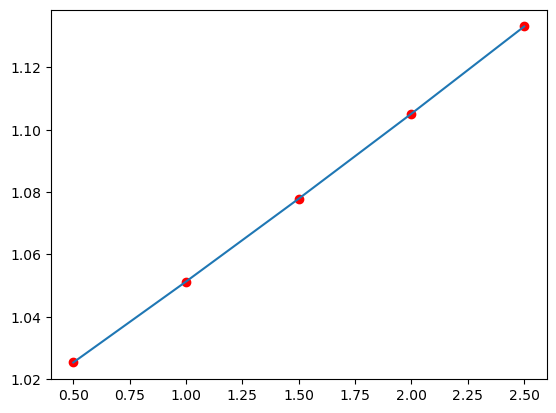

In [10]:
#1) Fit a Lagrange polynomial to the data in the table above and plot the result.

import numpy as np
from matplotlib import pyplot as plt
from math import sin, pi



def f(t):
    return np.exp(0.05*t)


x = np.array([0.5, 1, 1.5, 2, 2.5])
y = np.array([f(_) for _ in x])


def lagrange(x_new):
    d = x.shape[0] - 1 # 4th degree
    s = 0.0
    for i in range(d+1):
        p = y[i]
        for j in range(d+1):
            if i != j:
                p = p * ((x_new - x[j]) / (x[i] - x[j]))
        s = s + p
    return s


 
vt = np.array([lagrange(i) for i in x])  #passing  in lagrange function



plt.scatter(x, y, color='red')
plt.plot(x, vt)  
plt.show()


In [18]:
#2) Find distance traveled from 𝑡0 = 0.5 to 𝑡4 = 2.5 by integrating 𝑣(𝑡) using a
#2nd order polynomial with 𝑛 = 3 segments.


N=3
a,b=0.5,2.5
h=(b-a)/(2*N)
x1=np.array([a+(i*h) for i in range(2*N+1)])
y1=np.array([f(_) for _ in x1])


def distance_2nd(x, y):
    n_seg=x.shape[0]-1
    h=(x[n_seg]-x[0])/n_seg
    s=y[0]+y[n_seg]
    
    for i in range (1,n_seg):
        if i%2!=0:
            s=s+4*y[i]
    
    for j in range (2,n_seg-1):
        if j%2==0:
            s=s+2*y[j]
    
    return (h*s)/3




av = distance_2nd(x1, y1)
print("distance",av)


distance 2.1566666517724156


Total distance traveled: 2.156666670817085


In [24]:
#3) Compare the accuracy of the results from 2 with an 𝑛 = 2 segment 1st order
#integration technique
def firdOrderInt(f,low,high,N):
    h=(high-low)/N
    s=f(low)+f(high)
    for i in range(1,N):
        xi=low+i*h
        s=s+2*f(xi)
    return (s*h)/2

N=3
a,b=0.5,2.5

Av=firdOrderInt(f,a,b,N)


print(Av)
print(av,Av)
print("diff=",Av-av)

2.156866338506619
2.1566666517724156 2.156866338506619
diff= 0.00019968673420356353
